In [54]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(os.path.join("data/KidneyData.csv"))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna(how='any')

# Preprocessing of Data

In [56]:
data = df["cad"].copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,no,yes
3,1,0
9,1,0
11,1,0
14,0,1
20,0,1


In [57]:
target = data_binary_encoded["no"]
target_names = ["negative", "positive"]

In [58]:
kidney_data = df.drop(columns=["cad", "id"], axis=1)

In [61]:
data1 = kidney_data.copy()

data_binary_encoded1 = pd.get_dummies(data1, columns=["rbc", "pc", "pcc", "ba", "htn", "dm", "appet", "pe", "ane", "classification"])
data_binary_encoded1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,0,1,1,0,0,1,1,0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,0,1,0,1,1,0,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,1,0,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,1,0


In [62]:
data_binary_encoded1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal',
       'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
       'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'appet_good',
       'appet_poor', 'pe_no', 'pe_yes', 'ane_no', 'ane_yes',
       'classification_ckd', 'classification_notckd'],
      dtype='object')

In [63]:
kidney_binary_data = data_binary_encoded1.drop(columns=['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes','appet_poor', 'pe_yes', 'ane_yes', 'classification_notckd'])
kidney_binary_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'pc_abnormal', 'pcc_notpresent',
       'ba_notpresent', 'htn_no', 'dm_no', 'appet_good', 'pe_no', 'ane_no',
       'classification_ckd'],
      dtype='object')

In [64]:
feature_names = kidney_binary_data.columns

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kidney_binary_data, target, random_state=630)

# Decision Tree:

In [188]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
DTA = round(clf.score(X_test, y_test)*100, 2)
DTA

90.0

Decision Tree Confusion matrix, without normalization
[[ 1  3]
 [ 2 34]]
Decision Tree Normalized confusion matrix
[[0.25 0.75]
 [0.06 0.94]]


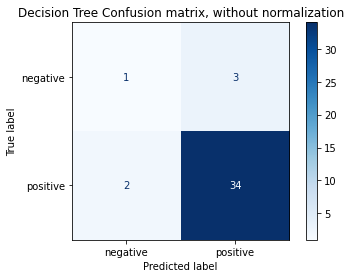

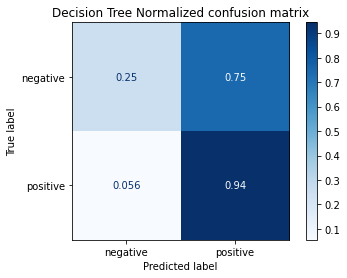

In [67]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Decision Tree Confusion matrix, without normalization", None),
                  ("Decision Tree Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forest:

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
RFA = round(rf.score(X_test, y_test)*100, 2)
RFA

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


90.0

In [78]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09661229293264592, 'age'),
 (0.09113461448536335, 'sc'),
 (0.08279491410728082, 'bgr'),
 (0.07667723329630502, 'rc'),
 (0.07007045684240301, 'bu'),
 (0.06683970845353135, 'pot'),
 (0.05853865212516145, 'hemo'),
 (0.05416986142494776, 'bp'),
 (0.05358453718819018, 'pcc_notpresent'),
 (0.04994828987325459, 'pcv'),
 (0.04488274007817149, 'sod'),
 (0.03735509725845356, 'al'),
 (0.033984872257650255, 'su'),
 (0.03275650087872048, 'wc'),
 (0.02827014409195723, 'sg'),
 (0.027871424347069244, 'ba_notpresent'),
 (0.020101978141841826, 'rbc_abnormal'),
 (0.01956429995510524, 'pe_no'),
 (0.017119286298793078, 'htn_no'),
 (0.010325048898240293, 'dm_no'),
 (0.010013028616134852, 'pc_abnormal'),
 (0.007346570090503163, 'appet_good'),
 (0.0072291255536215265, 'ane_no'),
 (0.0028093228046543635, 'classification_ckd')]

Random Forrest Confusion matrix, without normalization
[[ 0  4]
 [ 0 36]]
Random Forrest Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


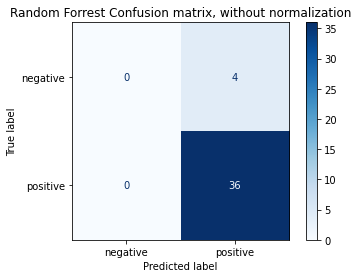

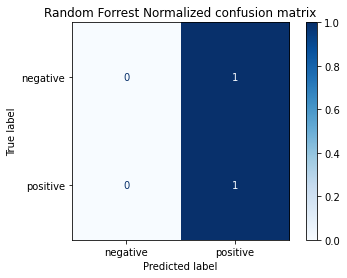

In [79]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Random Forrest Confusion matrix, without normalization", None),
                  ("Random Forrest Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [81]:
classifier.fit(X_train, y_train)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [161]:
LRA = round((classifier.score(X_test, y_test) * 100),2)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
LRA

Training Data Score: 0.9152542372881356
Testing Data Score: 0.95


95.0

In [83]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [84]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


Logistic Regression Confusion matrix, without normalization
[[ 1  3]
 [ 1 35]]
Logistic Regression Normalized confusion matrix
[[0.25 0.75]
 [0.03 0.97]]


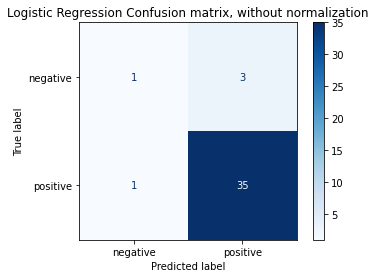

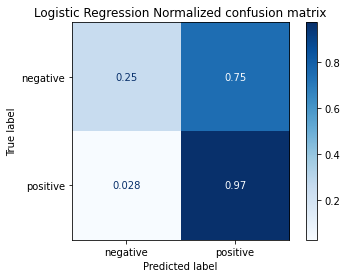

In [85]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVC

In [163]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
svc = model.fit(X_train, y_train)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [164]:
print('Test Acc: %.3f' % model.score(X_test, y_test))
SVMA = round((svc.score(X_test, y_test) * 100),2)
SVMA

Test Acc: 0.900


90.0

In [93]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       1.00      0.25      0.40         4
    positive       0.92      1.00      0.96        36

    accuracy                           0.93        40
   macro avg       0.96      0.62      0.68        40
weighted avg       0.93      0.93      0.90        40



Support Vector Machine Confusion matrix, without normalization
[[ 1  3]
 [ 0 36]]
Support Vector Machine Normalized confusion matrix
[[0.25 0.75]
 [0.   1.  ]]


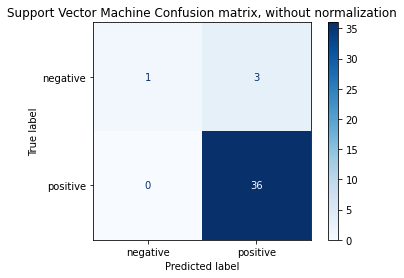

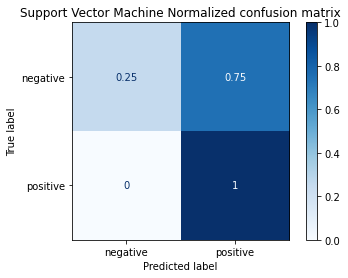

In [94]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Support Vector Machine Confusion matrix, without normalization", None),
                  ("Support Vector Machine Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# One-Hot Encoding

In [24]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

# Scaling the Data:

In [95]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [96]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbor

In [108]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.875
k: 3, Train/Test Score: 0.949/0.950
k: 5, Train/Test Score: 0.949/0.925
k: 7, Train/Test Score: 0.949/0.875
k: 9, Train/Test Score: 0.932/0.900
k: 11, Train/Test Score: 0.932/0.900
k: 13, Train/Test Score: 0.941/0.900
k: 15, Train/Test Score: 0.941/0.900
k: 17, Train/Test Score: 0.941/0.900
k: 19, Train/Test Score: 0.941/0.900
k: 21, Train/Test Score: 0.941/0.900
k: 23, Train/Test Score: 0.941/0.900
k: 25, Train/Test Score: 0.941/0.900
k: 27, Train/Test Score: 0.941/0.900
k: 29, Train/Test Score: 0.941/0.900


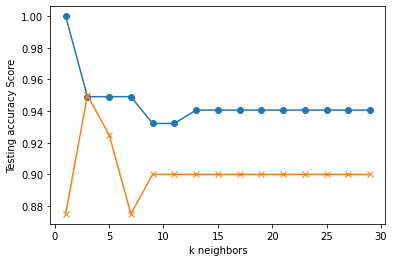

In [111]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [165]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
KNNA = round((knn.score(X_test_scaled, y_test) * 100),2)
KNNA

k=13 Test Acc: 0.925
k=9 Test Acc: 0.925


C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


92.5

# Neural Network

In [169]:
from tensorflow.keras.utils import to_categorical

In [170]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=48, activation='relu', input_dim=24))
model.add(Dense(units=2, activation='softmax'))

In [172]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 48)                1200      
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 98        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [173]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [174]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 118 samples
Epoch 1/100
118/118 - 0s - loss: 0.5398 - accuracy: 0.8220
Epoch 2/100
118/118 - 0s - loss: 0.4648 - accuracy: 0.8644
Epoch 3/100
118/118 - 0s - loss: 0.4052 - accuracy: 0.8983
Epoch 4/100
118/118 - 0s - loss: 0.3548 - accuracy: 0.8983
Epoch 5/100
118/118 - 0s - loss: 0.3125 - accuracy: 0.9153
Epoch 6/100
118/118 - 0s - loss: 0.2771 - accuracy: 0.9237
Epoch 7/100
118/118 - 0s - loss: 0.2496 - accuracy: 0.9237
Epoch 8/100
118/118 - 0s - loss: 0.2264 - accuracy: 0.9322
Epoch 9/100
118/118 - 0s - loss: 0.2090 - accuracy: 0.9407
Epoch 10/100
118/118 - 0s - loss: 0.1926 - accuracy: 0.9322
Epoch 11/100
118/118 - 0s - loss: 0.1795 - accuracy: 0.9322
Epoch 12/100
118/118 - 0s - loss: 0.1691 - accuracy: 0.9322
Epoch 13/100
118/118 - 0s - loss: 0.1600 - accuracy: 0.9492
Epoch 14/100
118/118 - 0s - loss: 0.1513 - accuracy: 0.9492
Epoch 15/100
118/118 - 0s - loss: 0.1436 - accuracy: 0.9492
Epoch 16/100
118/118 - 0s - loss: 0.1377 - accuracy: 0.9492
Epoch 17/100
118/118 - 0s - 

In [175]:
# Neural Network Acct
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

NNA = round((model_accuracy * 100),2)
NNA

40/40 - 0s - loss: 0.1756 - accuracy: 0.9500
Normal Neural Network - Loss: 0.1756237506866455, Accuracy: 0.949999988079071


95.0

# Deep Learning

In [176]:
deep_model = Sequential()
deep_model.add(Dense(units=48, activation='relu', input_dim=24))
deep_model.add(Dense(units=24, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [177]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 118 samples
Epoch 1/100
118/118 - 0s - loss: 0.7927 - accuracy: 0.2966
Epoch 2/100
118/118 - 0s - loss: 0.7054 - accuracy: 0.5508
Epoch 3/100
118/118 - 0s - loss: 0.6309 - accuracy: 0.8220
Epoch 4/100
118/118 - 0s - loss: 0.5655 - accuracy: 0.8644
Epoch 5/100
118/118 - 0s - loss: 0.5028 - accuracy: 0.8814
Epoch 6/100
118/118 - 0s - loss: 0.4435 - accuracy: 0.8983
Epoch 7/100
118/118 - 0s - loss: 0.3881 - accuracy: 0.9153
Epoch 8/100
118/118 - 0s - loss: 0.3392 - accuracy: 0.9237
Epoch 9/100
118/118 - 0s - loss: 0.2963 - accuracy: 0.9322
Epoch 10/100
118/118 - 0s - loss: 0.2586 - accuracy: 0.9237
Epoch 11/100
118/118 - 0s - loss: 0.2289 - accuracy: 0.9322
Epoch 12/100
118/118 - 0s - loss: 0.2058 - accuracy: 0.9407
Epoch 13/100
118/118 - 0s - loss: 0.1849 - accuracy: 0.9407
Epoch 14/100
118/118 - 0s - loss: 0.1677 - accuracy: 0.9492
Epoch 15/100
118/118 - 0s - loss: 0.1544 - accuracy: 0.9492
Epoch 16/100
118/118 - 0s - loss: 0.1432 - accuracy: 0.9661
Epoch 17/100
118/118 - 0s - 

In [178]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1756 - accuracy: 0.9500
Normal Neural Network - Loss: 0.1756237506866455, Accuracy: 0.949999988079071


In [179]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.2066 - accuracy: 0.9250
Deep Neural Network - Loss: 0.20660383701324464, Accuracy: 0.925000011920929


Logistic Regression Confusion matrix, without normalization
[[ 0  1]
 [ 1 38]]
Logistic Regression Normalized confusion matrix
[[0.   1.  ]
 [0.03 0.97]]


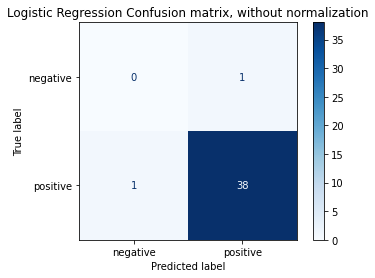

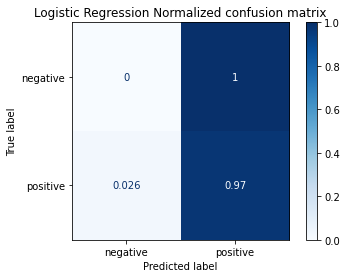

In [180]:
import numpy as np

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [181]:
# Deep Learning Acct
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


DLA = round((model_accuracy * 100),2)
DLA

40/40 - 0s - loss: 0.2066 - accuracy: 0.9250
Deep Neural Network - Loss: 0.20660383701324464, Accuracy: 0.925000011920929


92.5

# Model Accuracy

In [156]:
# CLF = clf.score(X_test, y_test) * 100

# LRA = classifier.score(X_test, y_test) * 100
# DTA = (clf.score(X_test, y_test) * 100)
# RFA = (rf.score(X_test, y_test) * 100)
# SVMA = (svc.score(X_test, y_test) * 100)
# KNNA = (knn.score(X_test_scaled, y_test) * 100)
# NNA = (model_accuracy * 100).round(2)

In [157]:
# print(f"LRA: {LRA}")
# print(f"DTA: {DTA}")
# print(f"RFA: {RFA}")
# print(f"SVMA: {SVMA}")
# print(f"KNNA: {KNNA}")
# print(f"NNA: {NNA}")

LRA: 95.0
DTA: 97.5
RFA: 100.0
SVMA: 92.5
KNNA: 97.5
NNA: 92.5


In [190]:
KidneyModelAccuracy_df = pd.DataFrame({"ML_Model":["Decision Tree","Random Forrest","Logistical Regression","Decision Tree","K Nearest Neighbors","Neural Network","Deep Learning"],
                            "Kidney_Model_Accuracy":[DTA, RFA, LRA, SVMA, KNNA, NNA, DLA]                       
                             })

KidneyModelAccuracy_df

,ML_Model,Kidney_Model_Accuracy
0,Decision Tree,90.0
1,Random Forrest,90.0
2,Logistical Regression,95.0
3,Decision Tree,90.0
4,K Nearest Neighbors,92.5
5,Neural Network,95.0
6,Deep Learning,92.5


In [193]:
Accuracy_df = pd.read_csv(os.path.join("data/Heart_Model_Accuracy.csv"))
Accuracy_df

,ML_Model,Accuracy
0,Decision Tree,78.67
1,Random Forrest,85.33
2,Logistical Regression,86.67
3,Support Vector Machine,89.33
4,K Nearest Neighbors,85.33
5,Neural Network,85.33
6,Deep Learning,81.33


In [194]:
Model_Accuracy_df = pd.merge(Accuracy_df, KidneyModelAccuracy_df, on='ML_Model')
Model_Accuracy_df = Model_Accuracy_df.rename(columns={'Accuracy':'Heart_Model_Accuracy'})
Model_Accuracy_df

,ML_Model,Heart_Model_Accuracy,Kidney_Model_Accuracy
0,Decision Tree,78.67,90.0
1,Decision Tree,78.67,90.0
2,Random Forrest,85.33,90.0
3,Logistical Regression,86.67,95.0
4,K Nearest Neighbors,85.33,92.5
5,Neural Network,85.33,95.0
6,Deep Learning,81.33,92.5


<AxesSubplot:>

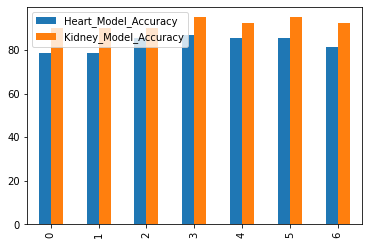

In [195]:
Model_Accuracy_df.plot(kind="bar")

In [199]:
Model_Accuracy_df.to_csv('data/Heart_Kidney_Model_Accuracy.csv',index=False)

# Linear Regression

In [ ]:
X = kidney_binary_data
y = target.values.reshape(-1, 1)
print(X.shape, y.shape)
print(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

In [ ]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### Linear Regression is not a good model for predicting the outcome because the residuals plot is not random indicating a non-linear relationship of the data.